# FoodLenz



> This will act as a food detector this will recognize the food.



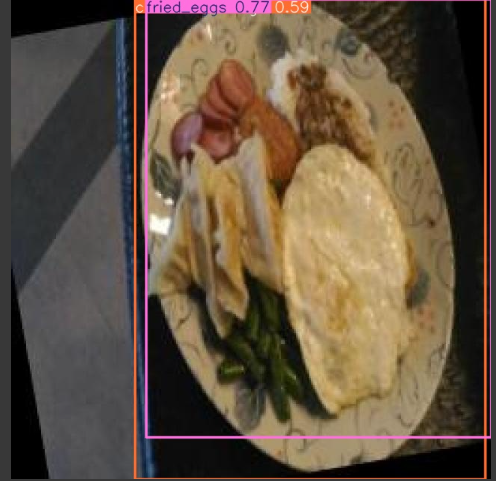

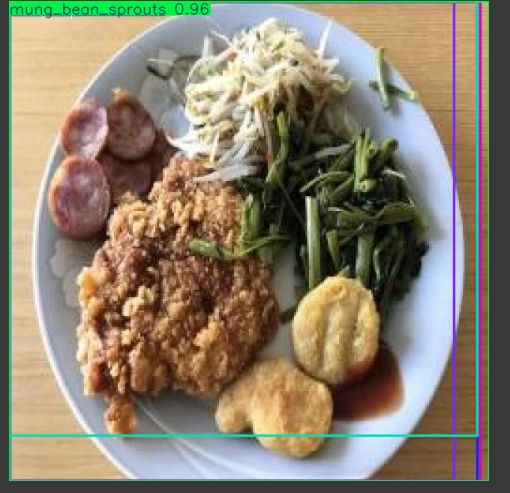

**Implementation of project**

    We are going to use YOLOv8 which is a
    State-of-the-Art for object detection
    and segementation model.
**Dataset**

    We are going to use a labelled dataset from
    roboflow which contains(10K) food images.
    we will not label the data manually.

# Installing Dependencies



> For this project we are using YOLOv8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Dataset

Dataset Split-

    Total : 10k images approx.
    Train Set:  70%         6909 Images
    Valid Set   20%         1975  Images
    Test Set    10%         989 Images





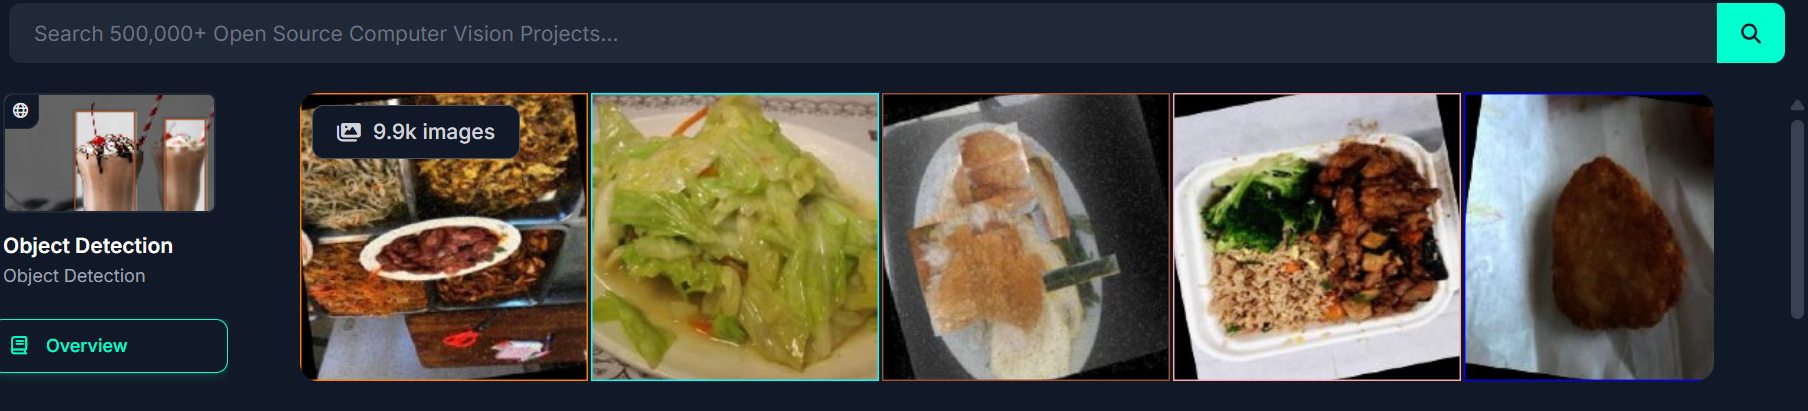


In [8]:
# through api key
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key= "") # api key has been removed
project = rf.workspace("ai-nutrient-tracker").project("object-detection-ez3ce")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-1 in yolov8:: 100%|██████████| 19758/19758 [00:07<00:00, 2538.48it/s]


In [ ]:
%cd {dataset.location}
!cat data.yaml
%cd ..

/content/Object-Detection-1
names:
- AW cola
- Beijing Beef
- Chow Mein
- Fried Rice
- Hashbrown
- Honey Walnut Shrimp
- Kung Pao Chicken
- String Bean Chicken Breast
- Super Greens
- The Original Orange Chicken
- White Steamed Rice
- black pepper rice bowl
- burger
- carrot_eggs
- cheese burger
- chicken waffle
- chicken_nuggets
- chinese_cabbage
- chinese_sausage
- crispy corn
- curry
- french fries
- fried chicken
- fried_chicken
- fried_dumplings
- fried_eggs
- mango chicken pocket
- mozza burger
- mung_bean_sprouts
- nugget
- perkedel
- rice
- sprite
- tostitos cheese dip sauce
- triangle_hash_brown
- water_spinach
nc: 36
roboflow:
  license: MIT
  project: object-detection-ez3ce
  url: https://universe.roboflow.com/ai-nutrient-tracker/object-detection-ez3ce/dataset/1
  version: 1
  workspace: ai-nutrient-tracker
test: ../test/images
train: ../train/images
val: ../valid/images
/content


# Training

In [ ]:
%cd {dataset.location}

!yolo task = detect mode = train model = yolov8s.pt data = {dataset.location}/data.yaml epochs = 1 imgsz = 128

/content/Object-Detection-1
New https://pypi.org/project/ultralytics/8.3.95 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Object-Detection-1/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

/content/Object-Detection-1


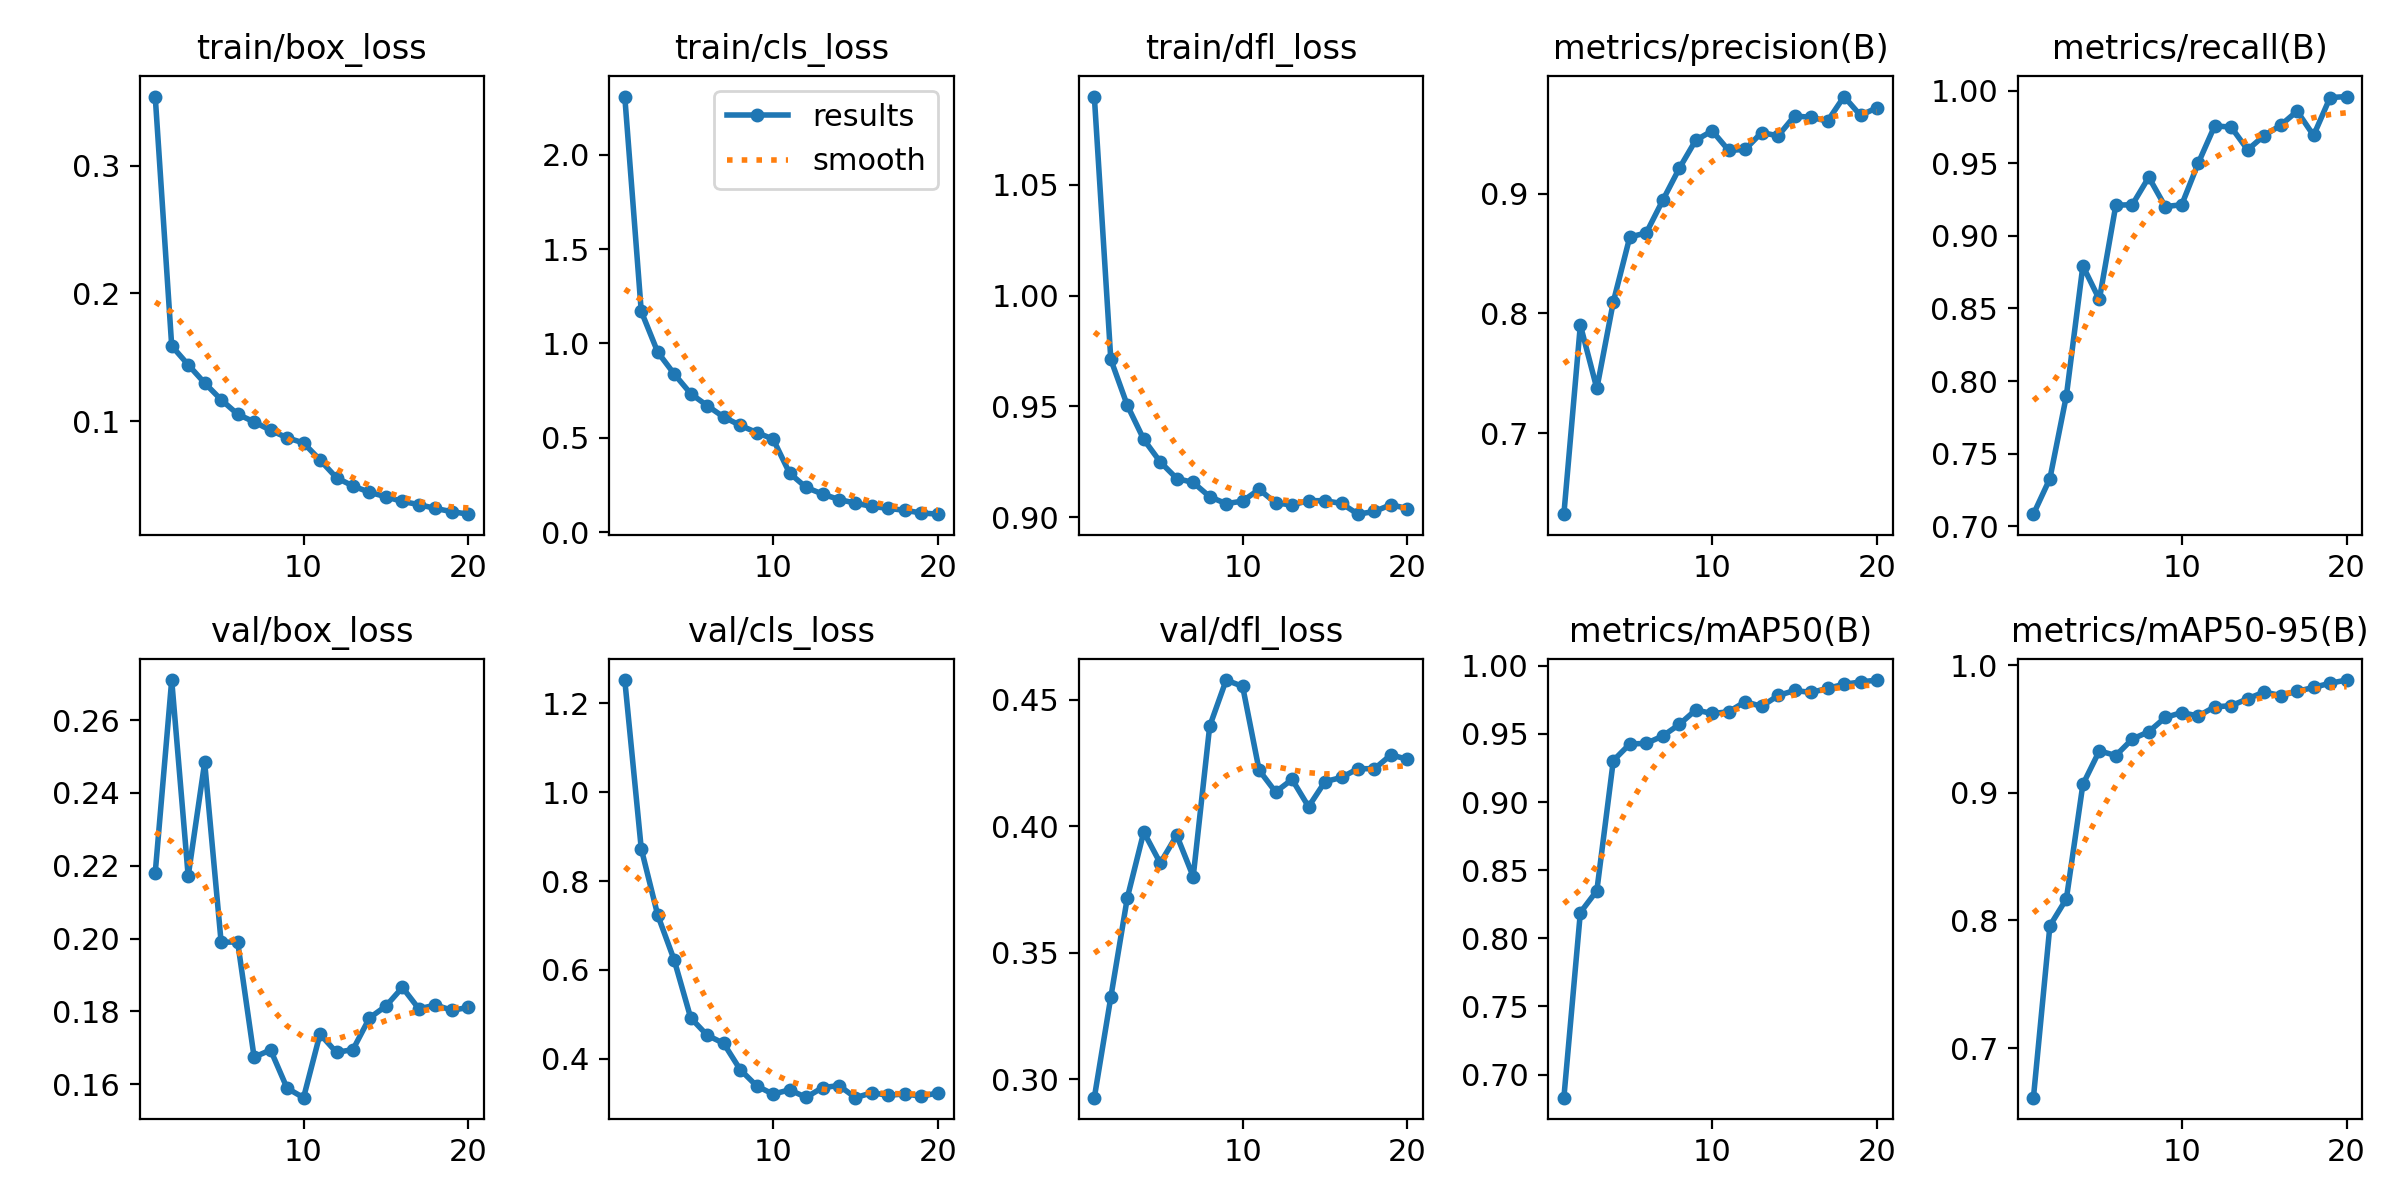

In [ ]:
%cd {dataset.location}
Image(filename=f'{dataset.location}/runs/detect/train2/results.png', width=700)

/content/Object-Detection-1


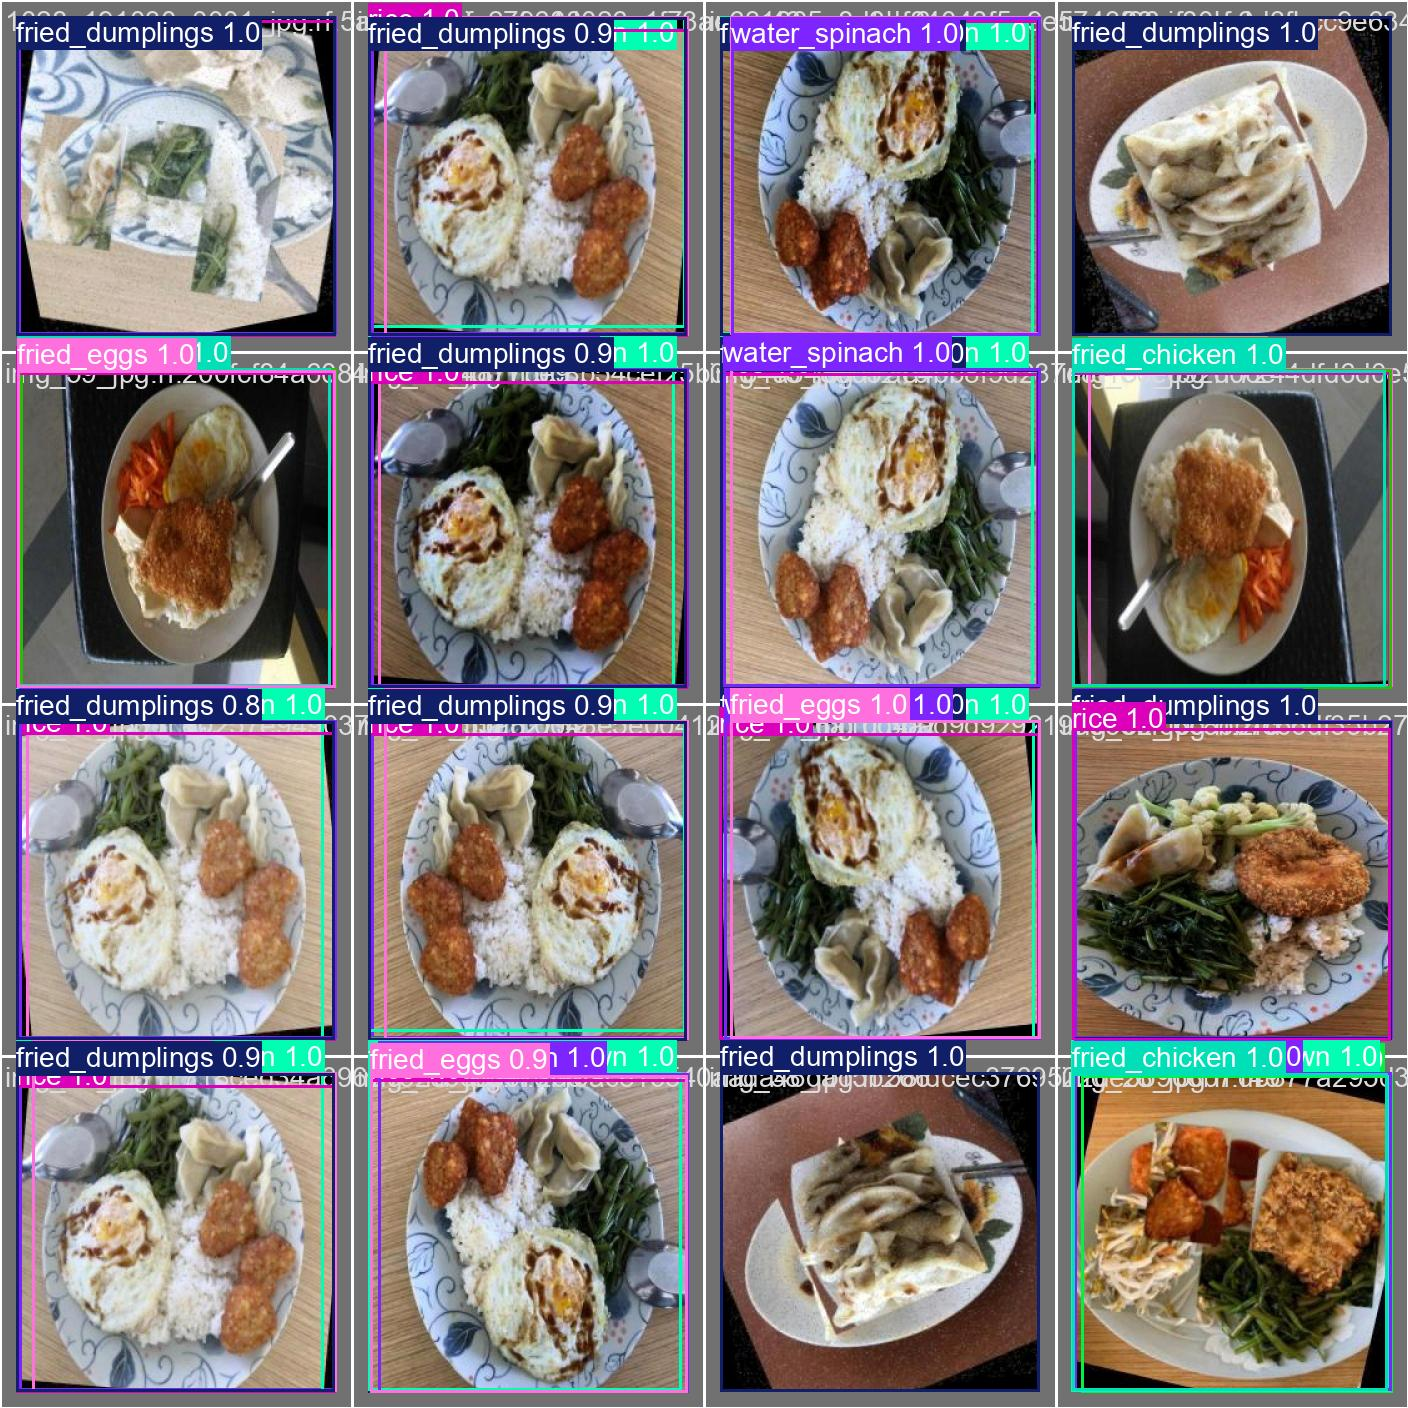

In [ ]:
%cd {dataset.location}
Image(filename=f'{dataset.location}/runs/detect/train2/val_batch0_pred.jpg', width=500)

# Validate

In [ ]:
%cd {dataset.location}

!yolo task=detect mode=val model={dataset.location}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/Object-Detection-1
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Object-Detection-1/valid/labels.cache... 1975 images, 0 backgrounds, 0 corrupt: 100% 1975/1975 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 124/124 [00:37<00:00,  3.34it/s]
                   all       1975       5953      0.606      0.729      0.717      0.663
               AW cola         74         74      0.963          1      0.995      0.987
          Beijing Beef        168        168       0.37          1       0.99      0.988
             Chow Mein         35         35      0.325          1      0.995       0.99
            Fried Rice         95         95      0.371      0.368      0.389      0.373
             Hashbrown         44         44      0.594      0.932      0.895      0.779
   H

# Inference

In [ ]:
%cd {dataset.location}
!yolo task=detect mode=predict model={dataset.location}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/Object-Detection-1
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,139,516 parameters, 0 gradients, 28.5 GFLOPs

image 1/989 /content/Object-Detection-1/test/images/1028_191030_0002_jpg.rf.d007b49b5a0e96e4a7a66512d117188d.jpg: 800x800 1 fried_dumplings, 1 rice, 1 water_spinach, 23.0ms
image 2/989 /content/Object-Detection-1/test/images/1028_191030_0004_jpg.rf.659499590b312aefffae3351ee4b2391.jpg: 800x800 1 fried_dumplings, 1 rice, 1 water_spinach, 23.0ms
image 3/989 /content/Object-Detection-1/test/images/1028_191030_0004_jpg.rf.b094e2d0e0bc53e41e8cb9099035a01b.jpg: 800x800 1 fried_dumplings, 1 rice, 1 water_spinach, 23.0ms
image 4/989 /content/Object-Detection-1/test/images/1028_191030_0007_jpg.rf.c0e1bbf628316e9efd122d0525c8484b.jpg: 800x800 1 fried_dumplings, 1 water_spinach, 23.4ms
image 5/989 /content/Object-Detection-1/test/images/1028_191030_0007_jpg.rf.e0cab37fdfd5dec50c067181d171f358.jpg: 80

*Results*

> These are the results after performing the model training.





> Here the 'predict' data has been used


> This can be changed to web cam based detection.


> One can also upload the video to detect the objects, codes will be diffrent.







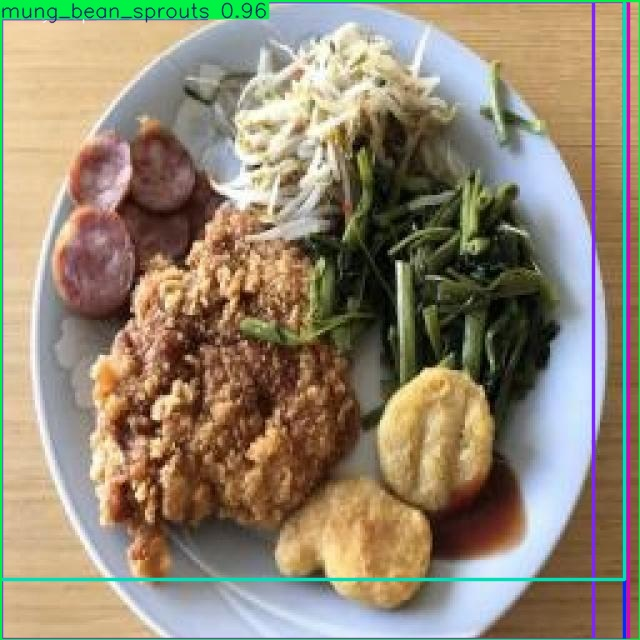

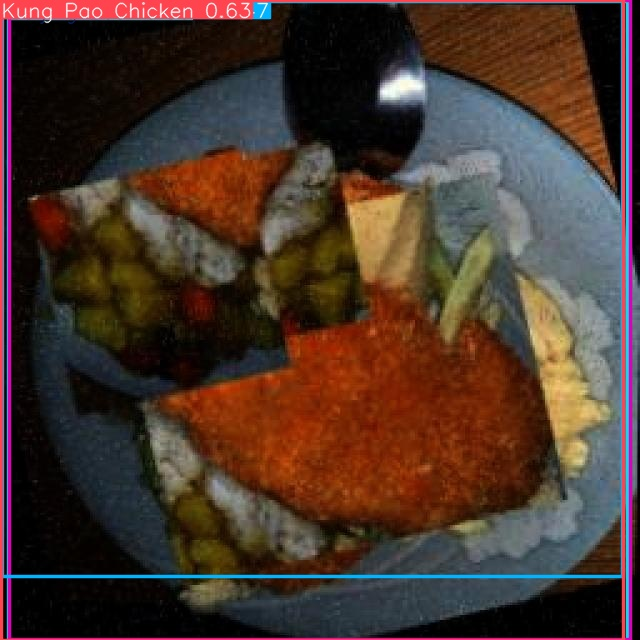

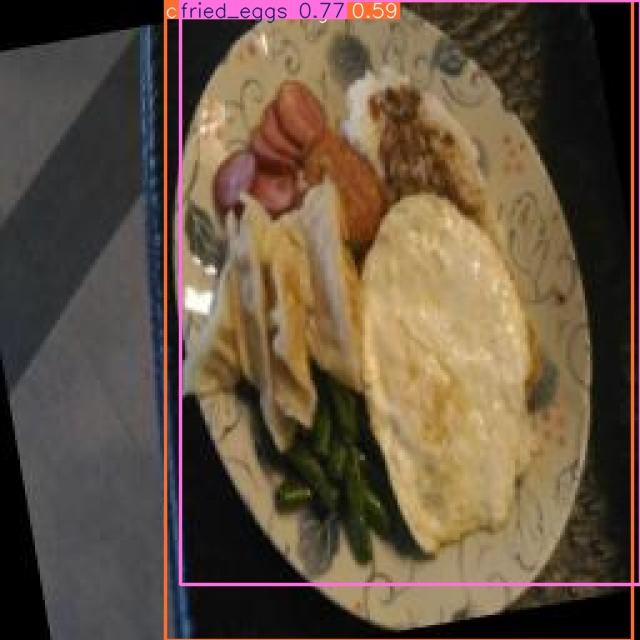

In [ ]:
import glob
import os
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/Object-Detection-1/runs/detect'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=400))
    print("\n")

# Deployment




> This will zip and download the model





In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

Streaming output truncated to the last 5000 lines.
  adding: train/labels/fried_eggs_24_jpg.rf.f785d8e6baebc86d2a50eb9925642809.txt (deflated 55%)
  adding: train/labels/1031_191103_0031_jpg.rf.0e94818f516a3c335128b6ae4a222589.txt (deflated 61%)
  adding: train/labels/1030_191030_0037_jpg.rf.0ef66b4b327ff17c210eda530d8564ff.txt (deflated 55%)
  adding: train/labels/fried_chicken_7_jpg.rf.e0da9d0630f200705a2b0132ceaa4b5c.txt (deflated 14%)
  adding: train/labels/IMG_2117_jpg.rf.47a617f3a6eeb0c804ce566a3edbb807.txt (deflated 41%)
  adding: train/labels/5_jpg.rf.db969ea34feaa44f1dd85724798c52c9.txt (deflated 52%)
  adding: train/labels/plate-220428-125105_jpg.rf.a7626e6e0cb439f8f463d5daabe6d01a.txt (deflated 61%)
  adding: train/labels/plate-220427-123505_jpg.rf.00acbbbbfaf0f765dcc48b14da79634f.txt (deflated 61%)
  adding: train/labels/IMG_1003_jpg.rf.3791e46902e3ee851cb1bb5885d4db31.txt (deflated 41%)
  adding: train/labels/rice_14_jpg.rf.da81a6cf23fa9ce71a51c150dff8c682.txt (deflated 14